# Beautiful Charts

**Inhalt:** Etwas Chart-Formatierung

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Basic Parameter in der Plot-Funktion kennenlernen
- Intro für Ready-Made Styles und Custom Styles
- Lernen, wo man sich weiter informieren kann

## Charts in Pandas

Eine Reihe von Basic Chart-Funktionalitäten haben wir bereits kennengelernt:
- Line Plots
- Bar Charts
- Histogramme
- etc.

Wenn wir darüber hinausgehen wollen, kann es sehr schnell kompliziert werden.

Es gibt zig verschiedene Arten, wie man auf die Funktionen zugreifen kann und Charts formatieren kann.

Die Funktion, die wir bereits kennen, heisst `plot()`. Wir können sie ausgehend von einem Dataframe oder einer Serie verwenden.

Hier die offizielle Referenz dazu: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

Eine genauere Erklärung, was `plot()` macht, je nach dem, woher man sie startet: http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/

Wichtig zu wissen: die `plot()`-Funktion baut auf der Matplotlib-Bibliothek auf:  https://matplotlib.org/index.html

Man kann diese Bibliothek auch anders verwenden - das schauen wir uns ein anderes Mal an.



Check these:
- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

## Setup

Wir importieren dieses Mal diverse Libraries:

- Pandas

In [1]:
import pandas as pd

- und Matplotlib, um auf einige Spezialfunktionen zugreifen zu können

In [7]:
import matplotlib

In [8]:
import matplotlib.pyplot as plt

In [9]:
import matplotlib.patches as mpatches

In [10]:
import matplotlib.image as mpimg

Wie immer geben wir den Befehl, den Output der plot-Funktion direkt als Bild anzuzeigen

In [11]:
%matplotlib inline

## das Beispiel

Eine Liste von Ländern mit ihrer Grösse, BIP pro Kopf und Lebenserwartung

In [12]:
path = "dataprojects/countries/countries.csv"

In [13]:
df = pd.read_csv(path)

In [14]:
df.head(3)

,country,continent,gdp_per_capita,life_expectancy,population
0,Afghanistan,Asia,663,54.863,22856302
1,Albania,Europe,4195,74.200,3071856
2,Algeria,Africa,5098,68.963,30533827


## Elemente eines Charts

Ein Chart besteht aus überraschend vielen Elementen.

Die meisten Programmiersprachen verwenden ähnliche Namen dafür.

Hier die Bezeichnungen bei Pandas / Matplotlib:

(Quelle: https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

In [15]:
from IPython.display import display, Image

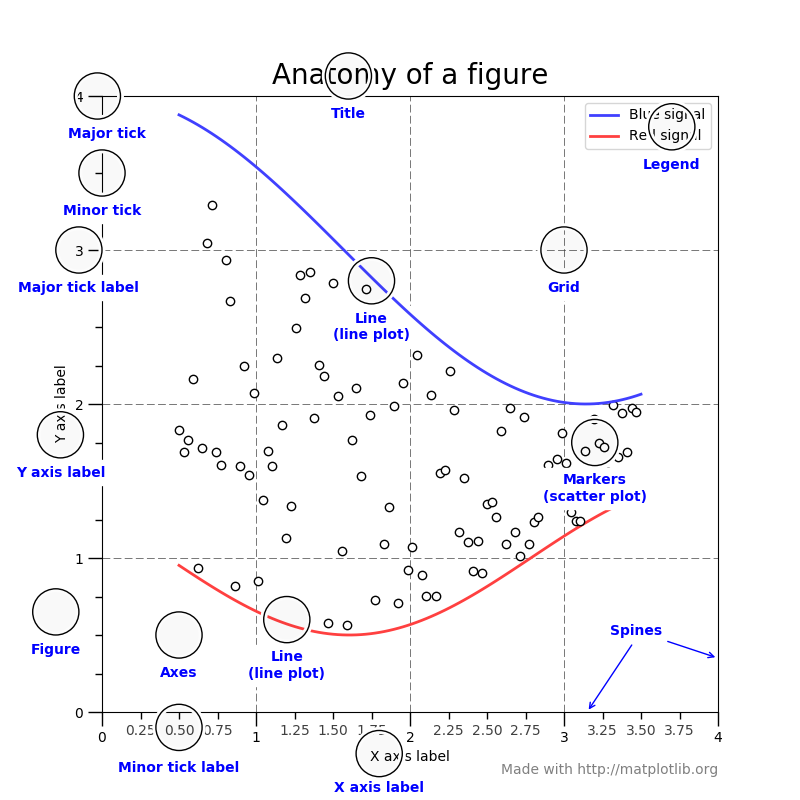

In [16]:
img = Image(filename='anatomy.png')
display(img)

## Ein simpler Scatterplot

Das hier kennen wir bereits:

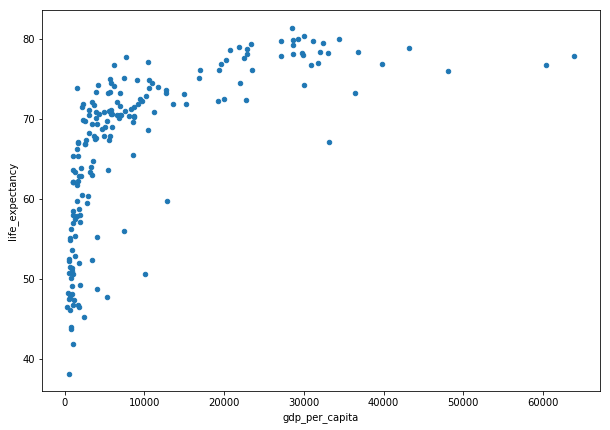

In [17]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy',
        figsize=(10,7))

## Den Chart verschönern

(oder verschlimmern, je nach dem, wie man es nimmt...)

In der Plot-Funktion selbst hat es bereits einige Parameter, mit denen wir etwas jspielen können:

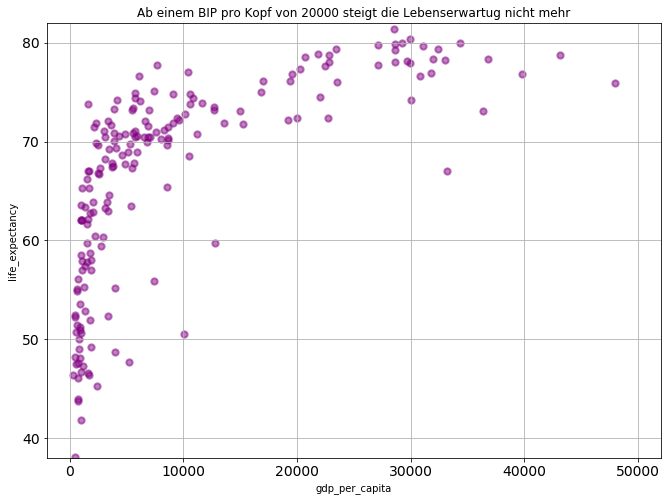

In [20]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy', 
        alpha=0.5,
        s=40,
        color='purple',
        linewidth=2,
        xlim=(-2000,52000),
        ylim=(38, 82),
        xticks=[0,10000,20000,30000,40000,50000],
        yticks=[0,40,50,60,70,80],
        figsize=(11,8),
        grid=True,
        fontsize=14, #applies to tick labels
        title='Ab einem BIP pro Kopf von 20000 steigt die Lebenserwartug nicht mehr')

Dazu gibt es noch zig weitere Einstellungen, die man im Nachhinein vornehmen kann.

Wir müssen dazu den Output der `plot()`-Funktion in einer eigenen Variable speichern.

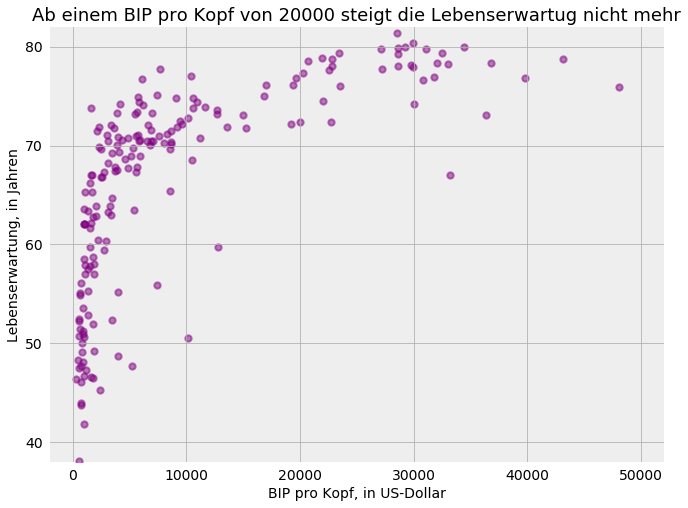

In [19]:
#Was man mit der Pandas-Funktion alles machen kann
fig = df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy', 
        alpha=0.5,
        s=40,
        color='purple',
        linewidth=2,
        xlim=(-2000,52000),
        ylim=(38, 82),
        xticks=[0,10000,20000,30000,40000,50000],
        yticks=[0,40,50,60,70,80],
        figsize=(11,8),
        grid=True,
        fontsize=14, #applies to tick labels
        title='Ab einem BIP pro Kopf von 20000 steigt die Lebenserwartug nicht mehr')

#Was man separat einstellen kann: - Titel
fig.set_title('Ab einem BIP pro Kopf von 20000 steigt die Lebenserwartug nicht mehr', fontsize=18)

# - Achsenbeschriftungen
fig.set_ylabel("Lebenserwartung, in Jahren", fontsize=14)
fig.set_xlabel("BIP pro Kopf, in US-Dollar", fontsize=14)

# - Ticks ausschalten
fig.xaxis.set_ticks_position('none')
fig.yaxis.set_ticks_position('none')

# - Rahmenlinien
fig.spines['right'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['bottom'].set_visible(False)

# - Hintergrundfarbe
fig.set_facecolor('#EEEEEE')

In [ ]:
import matplotlib.ticker as ticker
bottom_and_top_five_plot = bottom_and_top_five.plot(x='State', y='HighQ', kind="barh", legend=False)
bottom_and_top_five_plot.set_title("The top and bottom five states for HighQ weed price")
bottom_and_top_five_plot.set_xlabel("Price of HighQ weed on 01.01.2015")
bottom_and_top_five_plot.set_ylabel("")
bottom_and_top_five_plot.spines['top'].set_visible(False)
bottom_and_top_five_plot.spines['bottom'].set_visible(False)
bottom_and_top_five_plot.spines['left'].set_visible(False)
bottom_and_top_five_plot.spines['right'].set_visible(False)
bottom_and_top_five_plot.tick_params(axis='both', bottom='off', left='off')
bottom_and_top_five_plot.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

## Legende und Farben

Matplotlib/Pandas ist teils ziemlich kompliziert. Wie vorgehen, wenn wir die einzelnen Punkte entsprechend einer Kategorie einfärben wollen, zB nach dem Kontinent? Hier eine Lösung.

### Für die Farben

In [2]:
df['continent'].unique()

NameError: name 'df' is not defined

In [ ]:
colors = {
    'Asia': 'green',
    'Europe': 'blue',
    'Africa': 'brown',
    'N. America': 'yellow',
    'S. America': 'red',
    'Oceania': 'purple'
}

In [ ]:
colorlist = df['continent'].apply(lambda continent: colors[continent])

### Für die Legende

In [ ]:
patches = []
for continent, color in colors.items():
    this_patch = mpatches.Patch(color=color, label=continent, alpha=0.5)
    patches.append(this_patch)

### Für die Punktegrösse

In [ ]:
area = df['population'] / 400000

### Plotten

In [ ]:
#Was man mit der Pandas-Funktion alles machen kann
fig = df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy', 
        alpha=0.5,
        s=area,
        color=colorlist,
        linewidth=2,
        xlim=(-2000,52000),
        ylim=(38, 82),
        xticks=[0,10000,20000,30000,40000,50000],
        yticks=[0,40,50,60,70,80],
        figsize=(11,8),
        grid=True,
        fontsize=14, #applies to tick labels
        title='Ab einem BIP pro Kopf von 20000 steigt die Lebenserwartug nicht mehr')

#Was man separat einstellen kann: - Titel
fig.set_title('Ab einem BIP pro Kopf von 20000 steigt die Lebenserwartug nicht mehr', fontsize=18)

# - Achsenbeschriftungen
fig.set_ylabel("Lebenserwartung, in Jahren", fontsize=14)
fig.set_xlabel("BIP pro Kopf, in US-Dollar", fontsize=14)

# - Ticks ausschalten
fig.xaxis.set_ticks_position('none')
fig.yaxis.set_ticks_position('none')

# - Rahmenlinien
fig.spines['right'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.spines['top'].set_visible(False)
fig.spines['bottom'].set_visible(False)

# - Hintergrundfarbe
fig.set_facecolor('#EEEEEE')

# - Legende (this is really an ugly way to do this)
plt.legend(handles=patches, frameon=False, fontsize=14)

Hans Rosling would be so proud!! https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo

### Wichtig

Eine genaue und vollständige Liste der Parameter zu kriegen, ist so gut wie unmöglich (tell me if you find one!).

Daher, und nicht nur daher, lohnt es sich im allgemeinen nicht, allzu viel Zeit für die Formatierung von Charts aufzuwenden. Besser: Daten oder pdf evportieren und anderswo weiterbearbeiten.

Eine andere Option ist, mit einem prädefinierten Stil zu arbeiten

## Prädefinierte Stile

Diese Stile sind ziemlich praktisch. Man kann sich eine Liste davon anzeigen lassen:

In [ ]:
print(plt.style.available)

Um einen bestimmten Stil zu verwenden:

In [ ]:
plt.style.use('seaborn')

Umgesetzt sieht das dann so aus:

In [ ]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy',
        title='Lebenserwartung und Wohlstand')

Der neue Style bleibt so lange gespeichert, bis wir ihn wieder zurücksetzen.

In [ ]:
plt.style.use('default')

## Custom Style Sheets

Wer es mit den Matplotlib wirklich wissen will, kann sich auch sein eigenes Stylesheet erstellen.

Schritt1: Erstelle eine Datei mit diesem Namen (oder irgendeinem anderen Namen):

`my_style.mplstyle`

In die Datei, schreibe die eigenen Default-Werte für bestimmte Stil-Elemente rein:

`axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16
grid.color : red`

etc.

Die Dokumentation über alle möglichen Parameter gibt es hier: https://matplotlib.org/tutorials/introductory/customizing.html#sphx-glr-tutorials-introductory-customizing-py

Style laden:

In [ ]:
plt.style.use('my_style.mplstyle')

Test:

In [ ]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy',
        title='Lebenserwartung und Wohlstand')

## Exportieren

Wir können einzelne Plots als Dateien exportieren. Dazu 1x diese Einstellung ausführen:

In [ ]:
matplotlib.rcParams['pdf.fonttype'] = 42 #important for the fonts

Und dann exportieren.
- als pdf

In [ ]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy',
        title='Lebenserwartung und Wohlstand')
plt.savefig("Lebenserwartung-Wohlstand.pdf")

- als svg-Vektorgrafik

In [ ]:
df.plot(kind='scatter', 
        x='gdp_per_capita', 
        y='life_expectancy',
        title='Lebenserwartung und Wohlstand')
plt.savefig("Lebenserwartung-Wohlstand.svg")